In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# 1. Sentence Transformers
- Use Cafe receipts to show image search using vector embeddings through sentence transformers
- You can get the [Receipt dataset](https://expressexpense.com/blog/free-receipt-images-ocr-machine-learning-dataset/)

In [2]:
from sentence_transformers import SentenceTransformer, util 
import torch
from PIL import Image
from IPython.display import display
from IPython.display import Image as IPImage

2025-05-26 06:11:58.909478: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748239919.142698      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748239919.211948      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
dataset_path= "/kaggle/input/cafe-receipts/large-receipt-image-dataset-SRD"
paths = []
for dirname, _, files in os.walk(dataset_path):
    pass

for file in files:
    paths.append(os.path.join(dirname, file))

Opening file /kaggle/input/cafe-receipts/large-receipt-image-dataset-SRD/1087-receipt.jpg below


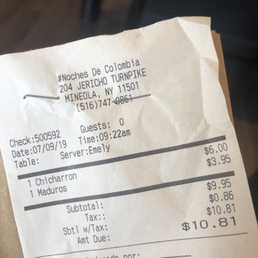

In [4]:
img = Image.open(paths[0])
print(f"Opening file {paths[0]} below")
display(img)

In [5]:
# Encoding images
model = SentenceTransformer("clip-ViT-B-32")
img_emb = model.encode([Image.open(filepath) for filepath in paths], batch_size=128, convert_to_tensor=True, show_progress_bar=True)

modules.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/1.91k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.03k [00:00<?, ?B/s]

0_CLIPModel/pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/961k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/604 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


Batches:   0%|          | 0/2 [00:00<?, ?it/s]

In [27]:
def search(query, k=3):
    # You can embedd both image or text to search for the image.
    query_emb = model.encode([query], convert_to_tensor=True, show_progress_bar=False)
    hits = util.semantic_search(query_emb, img_emb, top_k=k)[0]
    
    print("Query given is:")
    display(query)
    for hit in hits:
        print(paths[hit['corpus_id']]) 
        display(IPImage(os.path.join(dirname, paths[hit['corpus_id']]), width=200))

Query:


'cappuccino or coffee in california'

/kaggle/input/cafe-receipts/large-receipt-image-dataset-SRD/1057-receipt.jpg


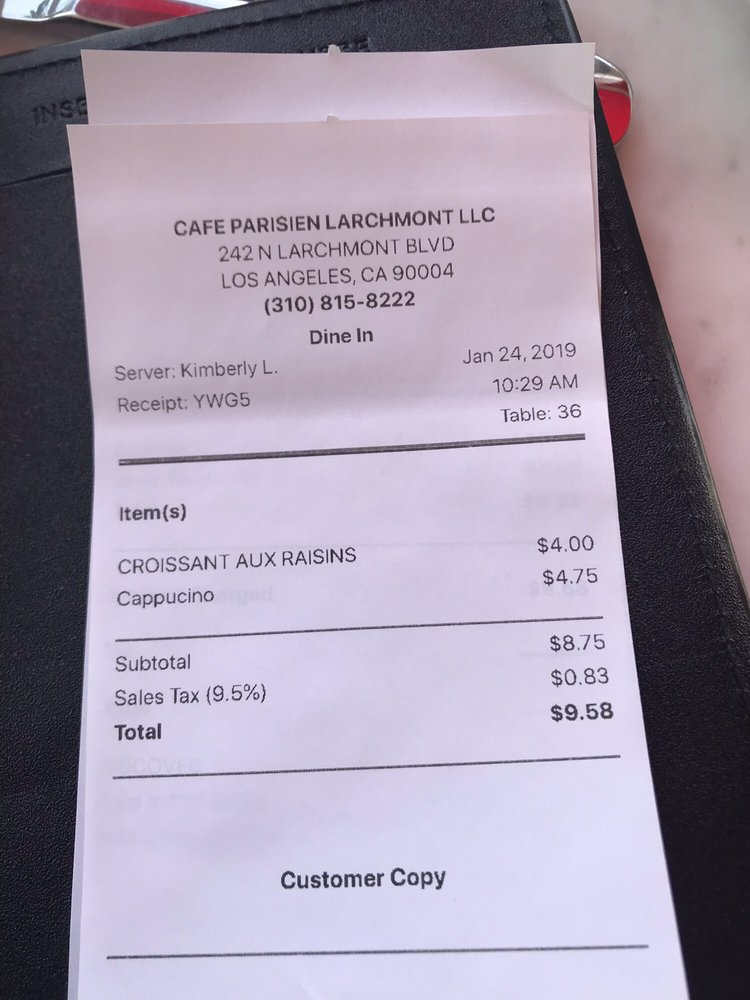

/kaggle/input/cafe-receipts/large-receipt-image-dataset-SRD/1105-receipt.jpg


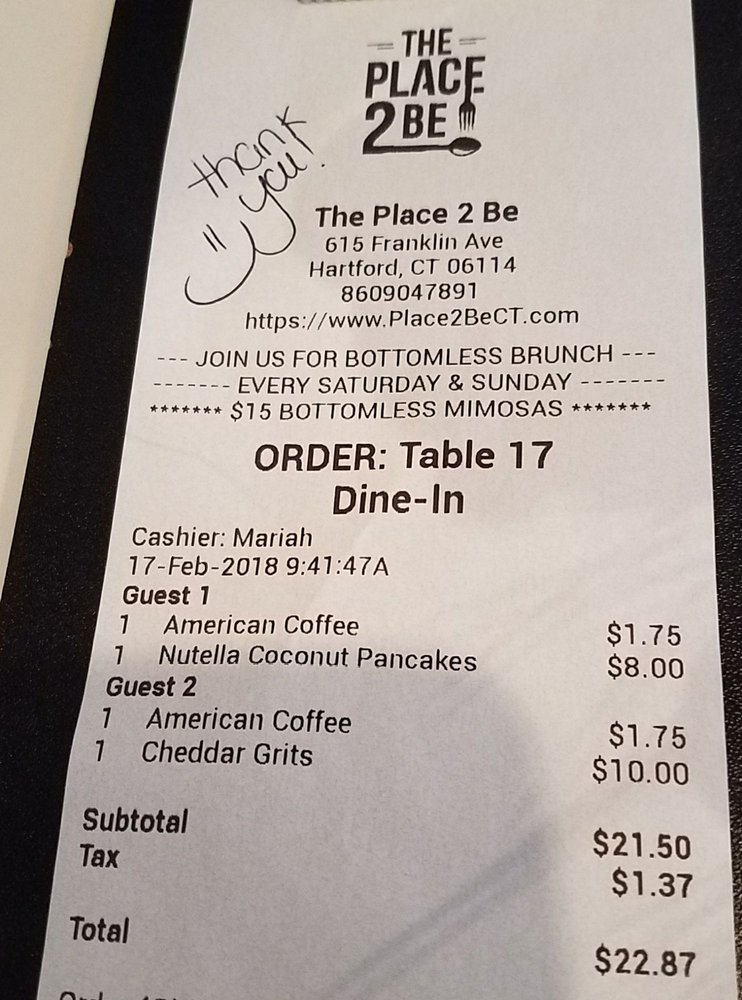

/kaggle/input/cafe-receipts/large-receipt-image-dataset-SRD/1035-receipt.jpg


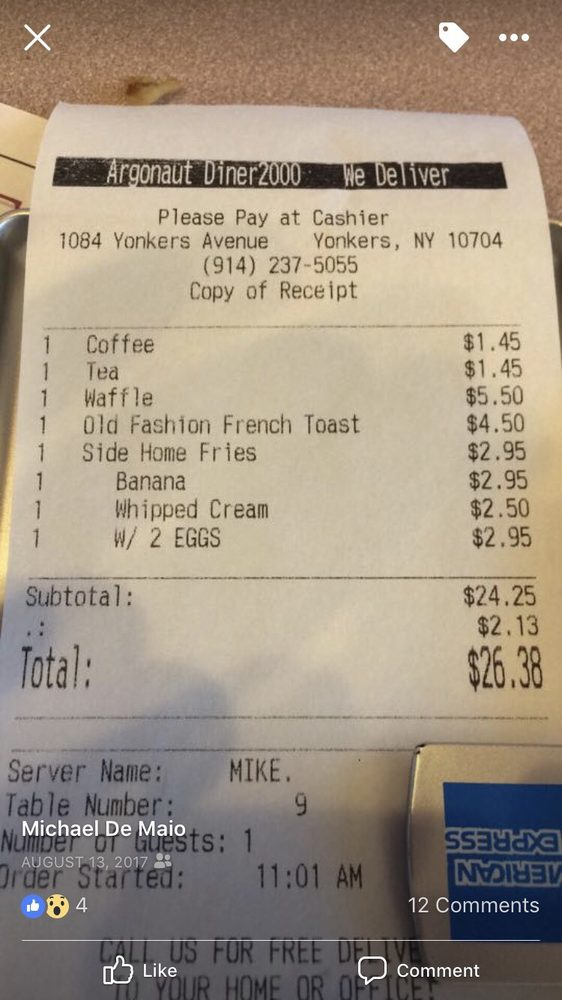

In [31]:
search("cappuccino or coffee in california")